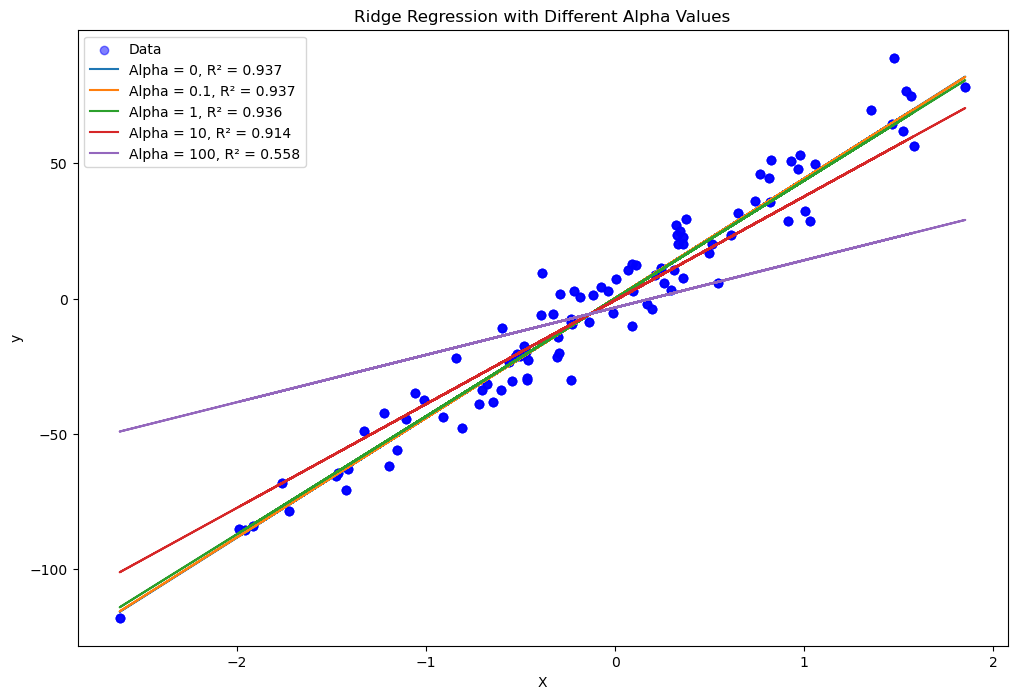

Alpha = 0:
  Coefficient: 44.2442
  Intercept: 0.0992
  R² Score: 0.9374

Alpha = 0.1:
  Coefficient: 44.1767
  Intercept: 0.0905
  R² Score: 0.9373

Alpha = 1:
  Coefficient: 43.5781
  Intercept: 0.0135
  R² Score: 0.9365

Alpha = 10:
  Coefficient: 38.3781
  Intercept: -0.6555
  R² Score: 0.9141

Alpha = 100:
  Coefficient: 17.4982
  Intercept: -3.3418
  R² Score: 0.5580



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from ridge_regression import RidgeRegression

# Generate sample data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Ridge Regression with different alpha values
alphas = [0, 0.1, 1, 10, 100]
models = [RidgeRegression(alpha=alpha) for alpha in alphas]

plt.figure(figsize=(12, 8))
for model, alpha in zip(models, alphas):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    
    plt.scatter(X, y, color='b', alpha=0.5, label='Data' if alpha == 0 else '')
    plt.plot(X, model.predict(X), label=f'Alpha = {alpha}, R² = {score:.3f}')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression with Different Alpha Values')
plt.legend()
plt.show()

# Print coefficients and intercepts
for model, alpha in zip(models, alphas):
    print(f'Alpha = {alpha}:')
    print(f'  Coefficient: {model.coef_[0]:.4f}')
    print(f'  Intercept: {model.intercept_:.4f}')
    print(f'  R² Score: {model.score(X_test, y_test):.4f}')
    print()